## Pandas

Let's start exploring datasets. For this we are going to use the `pandas` library.

In this section we will cover:

- Importing the library
- Exploratory analysis usiing `.head()`, `.tail()`, `.describe()` etc
- Understanding the data using `.value_counts()`, `.nunique()`, `.unique()`, `.max()` etc
- Aggregatory analysis using `.groupby()`.
- Plotting with `matplotlib`

Pandas is a sepcialised package that allows us to work with databases using python.

First we need to import the package

In [1]:
import pandas as pd

The dataset  we'll be using was downloaded as a CSV from [this Google Trends query](https://trends.google.com/trends/explore?date=2004-01-01%202020-12-31&q=%2Fm%2F05z1_,%2Fm%2F075st,%2Fm%2F0212jm,%2Fm%2F02p97,%2Fm%2F080_2).

<img src='images/what-i-think-i-do.png' width='600px' align='left'>

filepath: `data/programming-languages.csv`

This is a time series indexed by month with the search interest for each browser.

- **Month:** Each month from 2004-01 to 2020-12
- **Python:** Search interest for 
- **SQL:** Search interest for Python
- **R:** Search interest for R
- **JavaScript:** Search interest for JavaScript
- **Visual Basic for Applications:** Search interest for VBA

Google defines the values of search interest as:

Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Best of luck and may the best browser win!

In [2]:
# Create data to use:

trends = pd.read_csv('data/programming-trends.csv')

In [3]:
trends.head()

,Month,Python,SQL,R,JavaScript,Visual Basic for Applications
0,2004-01-01,14,84,6,88,14
1,2004-02-01,14,94,6,95,16
2,2004-03-01,15,93,<5,89,15
3,2004-04-01,14,96,7,90,15
4,2004-05-01,12,91,6,87,14


In [4]:
trends.index

RangeIndex(start=0, stop=204, step=1)

In [5]:
trends.columns

Index(['Month', 'Python', 'SQL', 'R', 'JavaScript',
       'Visual Basic for Applications'],
      dtype='object')

In [6]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Month                          204 non-null    object
 1   Python                         204 non-null    int64 
 2   SQL                            204 non-null    int64 
 3   R                              204 non-null    object
 4   JavaScript                     204 non-null    int64 
 5   Visual Basic for Applications  204 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.7+ KB


In [7]:
trends.describe()

,Python,SQL,JavaScript
count,204.000000,204.000000,204.000000
mean,19.725490,45.955882,41.132353
std,10.268472,20.952515,16.065970
min,11.000000,17.000000,22.000000
25%,13.000000,29.000000,31.000000
50%,14.000000,36.500000,33.000000
75%,24.250000,61.250000,48.250000
max,46.000000,100.000000,95.000000


In [8]:
trends.dtypes

Month                            object
Python                            int64
SQL                               int64
R                                object
JavaScript                        int64
Visual Basic for Applications    object
dtype: object

### Data Cleaning (wrangling)

<img src='images/spend-time.jpg' width='700px'>
<img src='images/enjoy-time.jpg' width='700px'>

Photo credit: [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=4cd1339a6f63)

DataFrame methods, like string methods, allow us to alter/change the dataframe without overwriting the original data.

- `.assign()`: Add new columns
- `.set_index()`: Set an index column
- `.replace()`: Replace values
- `.astype()`: Convert the datatypes in the df
- `.rename()`: rename columns or index names

In [9]:
trends_cleaned = (
    trends               
    .assign(Month = pd.to_datetime(trends['Month'])) # convert Month to pd datetime
    .set_index('Month')   # set Month as the index col
    .replace('<5','5')    # replace exact values in the df
    .astype(int)          # change all columns to dtype int
    .rename(columns={'Visual Basic for Applications':'VBA'}) # rename columns (not values)
)

### In-depth Analysis

In [10]:
python_start = trends_cleaned['Python'].loc['2004-01-01'] 
python_end = trends_cleaned['Python'].loc['2020-12-01']

print(f"Growth in Python searches from start of 2004 to end of 2020: {round(100*(python_end-python_start)/python_start, 2)}%")

Growth in Python searches from start of 2004 to end of 2020: 135.71%


### Plotting

In [11]:
import matplotlib.pyplot as plt
import matplotlib

# set matplotlib to show charts in the notebook
%matplotlib inline

# set fontsize for charts
font = {'size': 12}
matplotlib.rc('font', **font)

Plot the search interest of each language over time to compare:

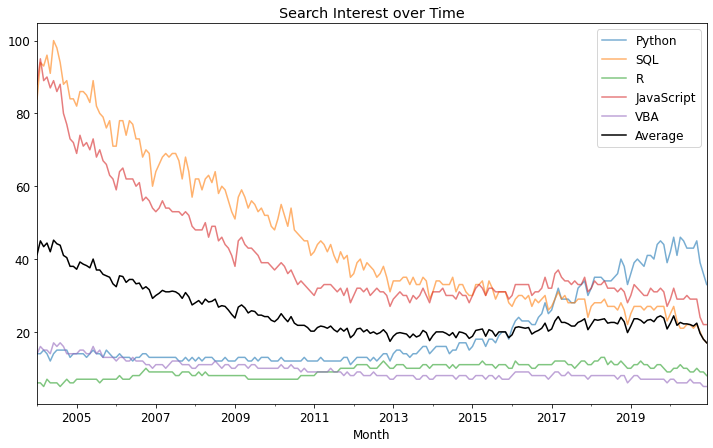

In [12]:
x = trends_cleaned.plot(figsize=(12,7), alpha=0.6, title='Search Interest over Time')
ax = trends_cleaned.mean(axis=1).plot(color='k', linestyle='-', label='Average')
plt.legend();

Smooth out the lines using rolling average or resample:

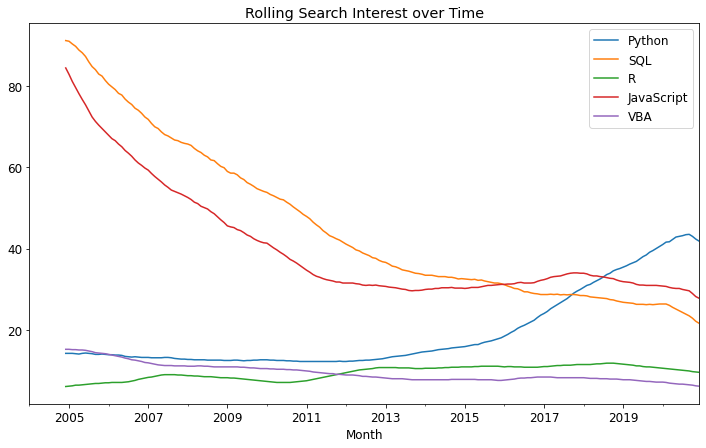

In [13]:
ax = (
    trends_cleaned
    .rolling(window=12)
    .mean()
    .plot(figsize=(12,7), title='Rolling Search Interest over Time')
)

Let's start looking at the percentage change in search interest over time...

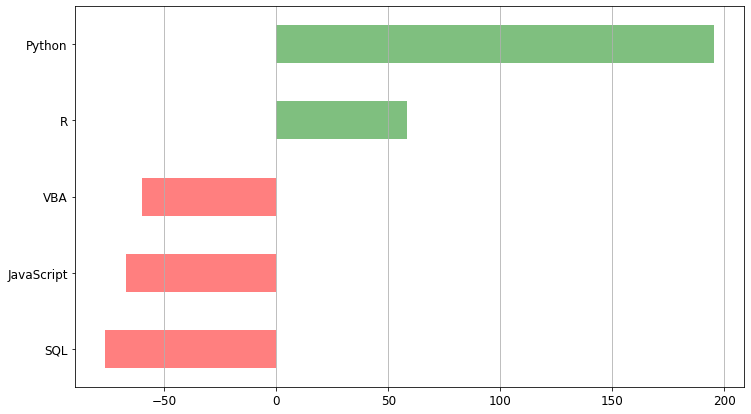

In [14]:
# grab the mean search interest for the start (2004) and end (2020) years
start = trends_cleaned.loc['2004'].mean()
end = trends_cleaned.loc['2020'].mean()

# calculate the percentage change
overall_pct_change = (100*((end-start)/start).round(4)).sort_values()

# plot the data on the axes: ax
ax = overall_pct_change.plot(kind='barh', 
                             figsize=(12,7), 
                             color=(overall_pct_change>= 0).map({True: 'g', False: 'r'}), 
                             alpha=0.5)
# add grid to graph for readability
ax.xaxis.grid()

# add title
# plt.title('Percent change in Search Interest from 2004 to 2020 in programming languages');

Let's zoom in on Python

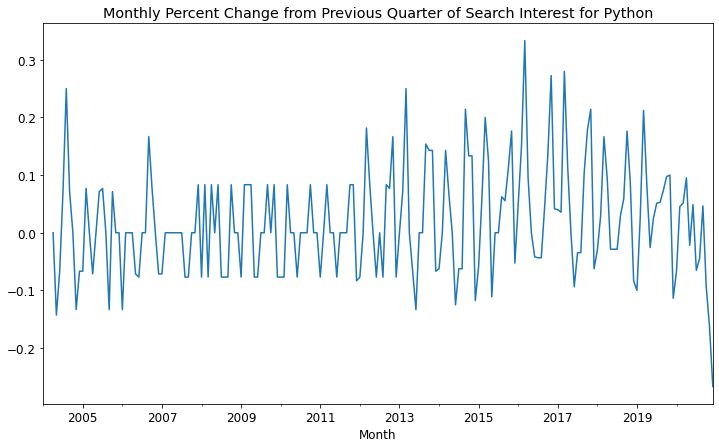

In [15]:
ax = trends_cleaned.pct_change(3)['Python'].plot(figsize=(12,7), title='Monthly Percent Change from Previous Quarter of Search Interest for Python')

That's a bit hard to read, and comparing with other languages will be very difficult on one plot. Let's use subplots to compare.

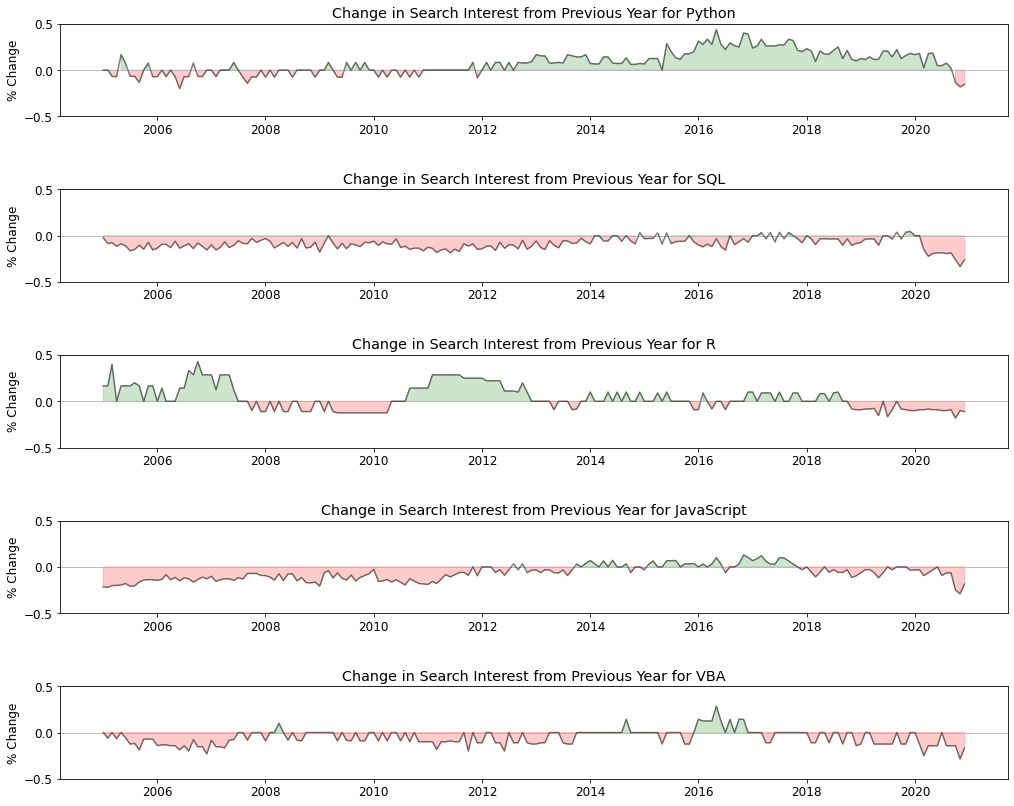

In [16]:
# look at the percentage increase in each month from 12 months ago (previous year)
trends_pct_change = trends_cleaned.pct_change(12)

fig, axs = plt.subplots(5, figsize=(15,12))

for ax, col in zip(axs, trends_pct_change.columns):
    ax.plot(trends_pct_change.index, trends_pct_change[col],  color='k', alpha=0.5) 
    ax.fill_between(trends_pct_change.index, trends_pct_change[col], where=trends_pct_change[col]<=0, color='r', alpha=0.2)
    ax.fill_between(trends_pct_change.index, trends_pct_change[col], where=trends_pct_change[col]>=0, color='g', alpha=0.2)
    ax.set_ylim([-0.5,0.5])
    ax.set_title(f"Change in Search Interest from Previous Year for {col}")
    ax.yaxis.grid()
    ax.set_ylabel('% Change')
    
plt.tight_layout(pad=3.0)

Resample by year and see the percent change of the average search interest year on year.

In [17]:
yearly_trends = (
    trends_cleaned
    .groupby(trends_cleaned.index.year)
    .sum()
    .pct_change()
)

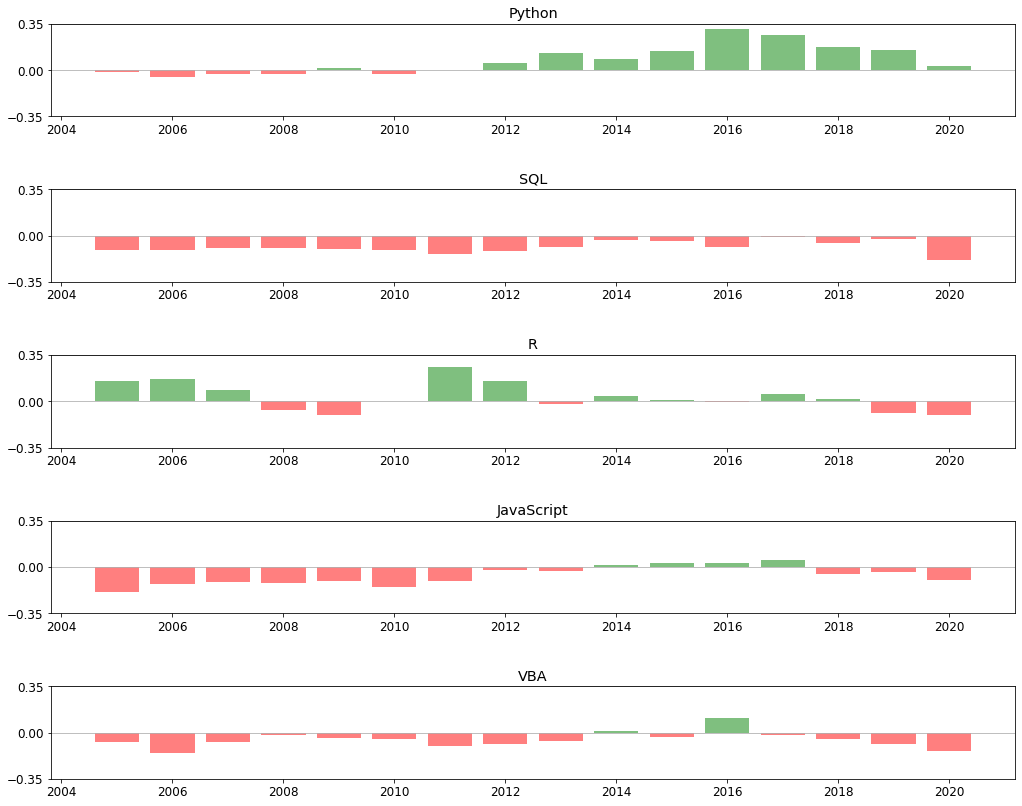

In [18]:
import numpy as np
fig, axs = plt.subplots(5, figsize=(15,12))

for ax, col in zip(axs, yearly_trends.columns):

    ax.bar(
           yearly_trends.index, 
           yearly_trends[col], 
           color=(yearly_trends[col] >= 0).map({True: 'g', False: 'r'}), alpha=0.5
          )
    
    ax.set_title(f"{col}")
    ax.yaxis.grid(which='major')
    ax.set_ylim([-0.35, 0.35])
    major_ticks = np.arange(-0.35,0.36,0.35)
    ax.set_yticks(major_ticks)
    
plt.tight_layout(pad=3.0)

<img src='images/panda.gif' width='300px' align='right'>

## Final thoughts...

Learning Pandas can be quite frustrating but with practice (and Google!) it becomes straightforward and very powerful.

**Want to learn more? Join us on a public course:**
- [Python for Data Analysts](https://godatadriven.com/training/python-for-data-analysts-training/)
- [Certified Python for Data Science](https://godatadriven.com/training/data-science-python-foundation-training/)
